# EL PROBLEMA DEL CLIQUE

**Autor: Jonay Suárez Ramírez | Fecha: 20/06/2020**

Antes de comenzar a hablar del problema en sí, hay un par de cosas de las que hay que hablar primero. ¿Por qué tiene interés este problema? y ¿Qué es un clique?

## Los 21 Problemas NP-completos de Karp

The Clique Problem es uno de los problemas originales de la lista de 21 problemas de Karp. Todos estos problemas son reducibles en tiempo polinómico de SAT. Dicho problema fue demostrado NP-completo por Stephen Cook en el teorema de Cook-Levin por lo que no se conoce ningún algoritmo polinómico que resuelva el problema.

https://en.wikipedia.org/wiki/Karp%27s_21_NP-complete_problems

## ¿Qué es un clique?

Un clique es un subconjunto de vértices de un grafo en el cual todos los nodos están conectados con todos los demás.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/VR_complex.svg/1200px-VR_complex.svg.png" width="700" />

## Problema de decisión del clique

El problema del clique definido formalmente, como todos los problemas de la lista de Karp, se define como un problema de satisfacibilidad. Donde dado un grafo $G$ y un entero positivo $K$, determinar si $G$ contiene un clique de tamaño $\geq$ $K$. Como cualquier clique de tamaño $N$ contiene subcliques de tamaño $1,2,..,N-2,N-1$, si un grafo contiene un clique de tamaño $> K$, como es obvio, tambien contiene un clique de tamaño $K$.

Veamos un ejemplo:

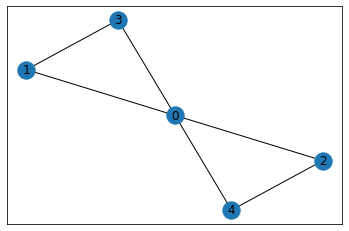

In [19]:
import networkx as nx

g = nx.Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(0,3)
g.add_edge(1,3)
g.add_edge(0,4)
g.add_edge(2,4)

nx.draw_networkx(g)

Si tenemos como entrada este grafo y $K = 3$, si se que se cumple.<br>
En cambio si $K = 4$, no hay ningún clique de tamaño 4, por lo tanto, no se cumple.

Esta definición a nivel formal está bien, pero a nivel práctico no es especialmente útil, por lo que otras definiciones usuales pueden ser más interesantes.

## Otras formulaciones al problema del clique

### Problema de los cliques maximales

Este problema consiste en encontrar todos los cliques maximales de un grafo. Un clique maximal es aquel en el que al menos 1 de sus vértices no está contenido en un clique mayor. Veamoslo con un ejemplo:

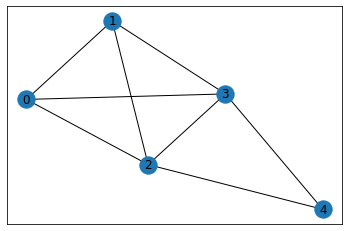

In [30]:
import networkx as nx

g = nx.Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(0,3)
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(2,3)
g.add_edge(2,4)
g.add_edge(3,4)

nx.draw_networkx(g)

En el grafo anterior los cliques maximales son {0,1,2,3} y {2,3,4}.

El clique {0,1,2} no sería maximal, porque todos los nodos están contenidos es un clique mayor ({0,1,2,3}).

Hay que recalcar que en el conjunto de cliques maximales deben estar contenidos todos los nodos del grafo, al menos, una vez.

### Problema del clique máximo

Este problema consiste en, dado un grafo **G**, encontrar el clique contenido en G de tamaño máximo (si hay más de uno, uno de ellos).

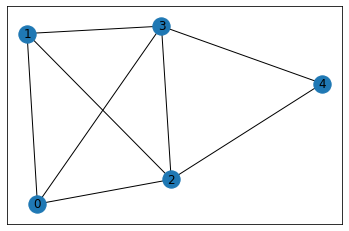

In [31]:
nx.draw_networkx(g)

En el grafo anterior, el clique máximo sería el que forman {0,1,2,3} de tamaño 4.

## Resolviendo el Problema del clique máximo

Entre las técnica más habituales para resolver el problema del clique máximo se encuentran fuerza bruta, backtracking y branch and bound. Al ser un problema NP-completo y ser inabordable, he descartado las dos primeras por motivos de eficiencia.

He empleado las siguiente técnicas para resolver el problema:
- Greedy
- Branch and bound
- Programación con restricciones
- Programación entera mixta

También planteo una posible aproximación al problema usando greedy y búsqueda tabú.

### Greedy

El algoritmo greedy se basa en tener un conjunto, $C$, de nodos incluidos en el clique actual y un conjunto, $S$, de nodos vecinos potenciales. Todos los nodos en $S$ son vecinos de todos los nodos que hay actualmente en $C$. Si $C=\emptyset$, entonces $S$ contiene a todos los nodos del grafo.

El algoritmo es el siguiente:

1. Inicializamos $C=\emptyset$ y $S$ con todos los nodos del grafo.
2. Mientras $S\neq\emptyset$:
 1. Buscar $n$ tal que, $Snuevo=S\cap Vecinos_n$ y $|Snuevo|$ sea máximo.
 2. Añadir $n$ a $C$ y actualizar $S=Snuevo$

De este modo, el primer nodo elegido siempre es el que tiene más vecinos en el grafo.

La implementación de este algoritmo en python, aprovechando la estructura de datos *set* nativa, es la siguiente:

In [32]:
"""
@author: Jonay Suárez Ramírez
"""
import networkx as nx

# g must be a networkx graph
def naive_greedy_maximum_clique(G):
    node_count = len(G)

    potential_clique = set(G.nodes)
    current_clique = set()

    while(potential_clique - current_clique):
        best_node = -1
        best_set = {}
        for node in (potential_clique - current_clique):
            node_nbs_set = set(G.neighbors(node))
            node_nbs_set.add(node)
            node_nbs_set = node_nbs_set & potential_clique
            if len(node_nbs_set) > len(best_set):
                best_node = node
                best_set = node_nbs_set

        current_clique.add(best_node)
        potential_clique = best_set

    solution = [0]*node_count
    for node in current_clique:
        solution[node] = 1

    return solution

def greedy_maximum_clique(node_count, edges):
    G = nx.Graph(edges)
    solution = naive_greedy_maximum_clique(G)
    return sum(solution), solution



#### Mejorar la estrategia Greedy con Búsqueda Tabú

La estrategia Greedy, aunque muy rápida, no asegura el óptimo y lo más probable es que llegue a un máximo local. 

Sabiendo esto, podemos complementar la solución Greedy con una metaheurística, por ejemplo, la búsqueda tabú. <br>
Podríamos aplicar búsqueda tabú con la misma heurística que el algoritmo greedy anterior de la siguiente manera:
- Los posible vecinos de una solución son:
 - Añadir un nodo de $S$ a $C$.
 - Quitar un nodo de $C$ y pasarlo a $S$.
- La heurística, tanto para añadir un nodo a $C$ como para sacarlo sería el nodo que máximice $|S|$.
- Cuando el procedimiento se encuentra que no hay nodos $S$ o que todos son tabú, pues sacará uno de $C$ y buscara otro para añadir.

### Branch and Bound

Para esta técnica, usaré un modelo distinto al anterior. En este caso uso un vector $C$ de variables de decisión binarias donde:
- $c_i = 1$ si el nodo $i$ está en el clique máximo
- $c_i = 0$ si el nodo $i$ no está en el clique máximo

El objetivo será maximizar $\sum C$.

La ramificación la haremos para cada nodo $i$ con $c_i=0$ y si es posible $c_i=1$ (Dependiendo de los nodos que ya esten en el clique se podrá añadir $i$ o no).

Como cota superior(Upper Bound) de cada nodo usaremos un algoritmo greedy de coloreado de grafos. Podemos asegurar que siempre el número cromático de un grafo es $\geq$ tamaño de clique máximo.

La implementación en python, usando el algoritmo de coloreado greedy de la librería networkx, es la siguiente:

In [33]:
"""
@author: Jonay Suárez Ramírez
"""
import networkx as nx

class Node:
    
    def __init__(self, index, clique, potential_nbs):
        self.index = index
        self.clique = clique
        self.clique_size = len(clique)
        self.potential_nbs = potential_nbs
        
    def estimate(self, G):
        if not self.potential_nbs:
            return self.clique_size
        subgraph = G.subgraph(self.potential_nbs)
        # uses a greedy coloring algortihm as upper bound
        res = nx.algorithms.coloring.greedy_color(subgraph)
        upper_bound = max(res.values()) + 1
        return self.clique_size + upper_bound

    
# DFS Branch and bound algorithm
def maximum_clique_branch_bound(G, q):
    
    def sort_by_nbs_count(n):
        nbs = 0
        for _ in G.neighbors(n):
            nbs += 1
        return nbs
    
    nodes = list(G.nodes)
    nodes.sort(key = sort_by_nbs_count, reverse = True)
    node_count = len(nodes)
    max_clique_size = 0
    max_clique = Node(0, set(), set(nodes)) # root node
    
    q.put(max_clique)
    
    alive = []
    alive.append(max_clique) # appends root node
    
    while alive:
        current = alive.pop()
        
        if current.clique_size > max_clique_size:
            max_clique_size = current.clique_size
            max_clique = current
            q.put(max_clique) # stores current max clique in the queue
            q.get() # discards previous max clique
        else:
            # if the current bound is lower than best incumbent
            # we stop branching
            if current.estimate(G) <= max_clique_size:
                continue
        
        # if we cant add more nodes to the clique
        # we stop branching
        if not current.potential_nbs:
            continue
        
        if current.index >= node_count:
            continue
        
        current_clique = current.clique
        current_nbs = current.potential_nbs
        current_node = nodes[current.index] 
        # Branch
        # xi = 0
        right_clique = current_clique.copy()
        right_nbs = current_nbs.copy()
        # if xi can be part of the current clique, removes it from nbs
        right_nbs.discard(current_node)
        right = Node(current.index + 1, right_clique, right_nbs)
        # DFS works like LIFO so we inspect first xi = 1 if possible
        alive.append(right)

        # if current node can be added to the current clique, xi = 1
        if current_node in current_nbs:
            left_clique = current_clique.copy()
            left_clique.add(current_node)
            left_nbs = current_nbs.copy()
            left_nbs = left_nbs & set(G.neighbors(current_node))
            left = Node(current.index + 1, left_clique, left_nbs)
            alive.append(left)
    
    taken = [0]*node_count
    for node in max_clique.clique:
        taken[node] = 1
        
    return max_clique_size, taken

### Programación con Restricciones

Como en el modelo de Branch and Bound. Usaremos un modelo con un vector $C$ de variables de decisión binarias donde:
- $c_i = 1$ si el nodo $i$ está en el clique máximo
- $c_i = 0$ si el nodo $i$ no está en el clique máximo

El objetivo será maximizar $\sum C$.

En este caso modelamos el grafo de entrada como una matriz de adyacencia binaria, $M$ donde si $M_{ij}=1$ entonces hay una arista que une $i$ con $j$ y viceversa, porque es un grafo no orientado.

La restricción mínima que necesita el modelo es:

Para todo $i,j$ donde $i\neq j$ se cumple que si $C_i=1$ y $C_j=1$ entonces $M_{ij}=1$.

*Nota: Dependiendo del solver, usar una Matriz booleana y un vector booleano en lugar de binario puede resultar en una mejor eficiencia en el tiempo de búsqueda.*

Modelo de Minizinc propuesto:

In [9]:
print("""int: nNodos;

set of int: NODOS = 1..nNodos;

array[NODOS, NODOS] of 0..1: adjMatrix;
array[NODOS] of var 0..1: maxClique;
var NODOS: cliqueSize = sum(maxClique);

constraint forall(i,j in NODOS where i != j )(maxClique[i] = 1 /\ maxClique[j] = 1 -> adjMatrix[i,j] = 1);

solve :: int_search(maxClique,
                    anti_first_fail,
                    indomain)
                    maximize cliqueSize;""")

int: nNodos;

set of int: NODOS = 1..nNodos;

array[NODOS, NODOS] of 0..1: adjMatrix;
array[NODOS] of var 0..1: maxClique;
var NODOS: cliqueSize = sum(maxClique);

constraint forall(i,j in NODOS where i != j )(maxClique[i] = 1 /\ maxClique[j] = 1 -> adjMatrix[i,j] = 1);

solve :: int_search(maxClique,
                    anti_first_fail,
                    indomain)
                    maximize cliqueSize;


### Programación Entera Mixta

Mantenemos la variable de decisión $C$, el objetivo y la representación del grafo como matriz de adyacencia, $M$, del modelo de programación con restricciones. Pero en este paradigma, las restricciones se tiene que expresar en forma de ecuaciones o inecuaciones lineales por lo que la restricción de programación con restricciones no sería válida.

La traducción más directa de la restricción del modelo anterior es:

para todo $i,j$ donde $i \neq j$ se tiene que cumplir $c_i * c_j \leq M_{ij}$. Pero está ecuación es no lineal.

Como son variables binarias podemos linealizarla así: $c_i + c_j - 1\leq M_{ij}$.

La implementación del modelo anterior usando la interfaz de python de Gurobi es la siguiente:

In [11]:
"""
@author: Jonay Suárez Ramírez
"""

import numpy as np
#from gurobipy import *

def MIP_maximum_clique(node_count, edges):
    
    adj_matrix = np.zeros((node_count,node_count), dtype=np.bool_)
    
    for edge in edges:
        adj_matrix[edge[0],edge[1]] = 1
        adj_matrix[edge[1],edge[0]] = 1
    
    m = Model("MaxClique")
    
    m.Params.TimeLimit = 180
    
    clique = m.addVars(node_count, vtype=GRB.BINARY, name="clique")
    
    m.setObjective( sum( clique[i] for i in range(node_count) ) , GRB.MAXIMIZE)
    
    m.addConstrs( (clique[i] + clique[j] - 1) <= adj_matrix[i,j] for i in range(node_count)
                     for j in range(i+1, node_count) )
                 
    m.optimize()
    
    solution = [clique[i].X for i in range(node_count)]
    
    return sum(solution), solution


## Resultados

Para probar las 4 implementaciones, usaremos unos ficheros de "benchmark". Los nombres de los ficheros son del tipo 50_1, el primer número representa el número de nodos en el grafo y el segundo número una escala en número de aristas. 50_1 tiene 50 nodos y es el que menos aristas tiene de 50 mientras 50_9 es el fichero con mayor número de aristas. A todas las técnicas se les dió los mismo ficheros (que representaban un grafo cada uno) y un límite de tiempo de 180 segundos por ficheros.

Fichero | Greedy | B & B | CP | MIP |
--- | --- | --- | --- | --- |
50_1 | 3 | 3 | 3 | 3 |
50_3 | 4 | 5 | 5 | 5 |
50_5 | 7 | 7 | 7 | 7 |
50_7 | 11 | 11 | 11 | 11 |
50_9 | 21 | 21 | 21 | 21 |

Fichero | Greedy | B & B | CP | MIP |
--- | --- | --- | --- | --- |
70_1 | 3 | 4 | 4 | 4 |
70_3 | 6 | 6 | 6 | 6 |
70_5 | 8 | 9 | 9 | 9 |
70_7 | 11 | 12 | 12| 12 |
70_9 | 24 | 25 | 25 | 25 |

Como era de esperar, en los ficheros más pequeños, 50_ y 70_, los resultados de las técnicas exactas son mejores que Greedy porque son capaces de alcanzar las soluciones óptimas en los 180 segunos de tiempos.

Fichero | Greedy | B & B | CP | MIP |
--- | --- | --- | --- | --- |
100_1 | 4 | 4 | 4 | 4 |
100_3 | 5 | 7 | 7 | 7 |
100_5 | 9 | 10 | 10 | 10 |
100_7 | 12 | 14 | 14| 14 |
100_9 | 27 | 30 | 28 | 30 |

En los ficheros de 100 nodos se mantiene la tendencia anterior pero se empieza a notar una carencia en programación con restricciones.

Fichero | Greedy | B & B | CP | MIP |
--- | --- | --- | --- | --- |
250_1 | 4 | 5 | 5 | 5 |
250_3 | 7 | 7 | 7 | 7 |
250_5 | 10 | 11 | 12 | 12 |
250_7 | 16 | 18 | 16| 18 |
250_9 | 38 | 41 | 30 | 45 |

En los ficheros de 250 agrava aún más la carencia de CP respecto a Branch and Bound y MIP (este último consigue los mejores resultados) e incluso el fichero 250_9 Greedy sobrepasa notablemente a Constraint Programming.

Fichero | Greedy | B & B | CP | MIP |
--- | --- | --- | --- | --- |
500_1 | 4 | 5 | 5 | 5 |
500_3 | 7 | 8 | 8 | 8 |
500_5 | 11 | 12 | 12 | 12 |
500_7 | 19 | 21 | 17| 20 |
500_9 | 51 | 48 | 25 | 48 |

Fichero | Greedy | B & B | CP | MIP |
--- | --- | --- | --- | --- |
1000_1 | 4 | 6 | 6 | 5 |
1000_3 | 8 | 9 | 9 | 7 |
1000_5 | 13 | 13 | 12 | 13 |
1000_7 | 21 | 21 | 17| 21 |
1000_9 | 57 | 54 | 28 | 55 |

En los ficheros con más nodos, 500_ y 1000_ las tendencias se mantienen en los ficheros pequeños pero los resultados de Greedy son muy sorprendentes en los ficheros con más aristas consigue los mejores resultados de las 4 técnicas. Se empieza a notar la exponencialidad del problema y las técnicas exactas tienen más problemas. 

MIP al ser probabilístico se comporta mejor en algunas ocasiones que otras.

CP tiene unos resultados pésimos en los últimos ficheros frente a los demás, es posible que esto se deba a que el modelo es muy mejorable.

Branch and Bound tiene un rendimiento bastante consistente, sin sorpresas, nunca es el peor pero no siempre es el mejor. Se justifica bastante bien su uso como estrategia usual para resolver este problema.

Greedy tiene unos resultados sorprendentes en los últimos ficheros que resultan muy interesante y añadiedole la mejora de tabú search antes mencionada podría, tal vez, tener unos resultados muy buenos en la mayoría de casos. Como no se implementó esa opción no he podido comprobarlo experimentalmente.

## Referencias Bibliográficas

Upper Bound en Branch and Bound: http://www.m-hikari.com/ams/ams-2014/ams-1-4-2014/mamatAMS1-4-2014-3.pdf

http://www.cs.ecu.edu/karl/6420/spr16/Notes/NPcomplete/clique.html

https://en.wikipedia.org/wiki/Karp%27s_21_NP_complete_problems

https://en.wikipedia.org/wiki/Clique_problem

https://es.qwe.wiki/wiki/Clique_problem